In [20]:
import pandas as pd
from word2vec_transformers import conceptcluster, tokenizer
from sklearn.cluster import KMeans


from datetime import timezone, datetime
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import make_pipeline, make_union
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import FunctionTransformer
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Data/wsb_full_not_deleted_withdt.csv")


C:\Users\lnajt\anaconda3\envs\Erdos_Institute\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (45,88,117,118,119,122,123,124,125) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
tokenizer().in_place(X = df, cols = ['title', 'selftext'])

# this replaces:
#df['tokenized_title'] = tokenizer().fit_transform(df.title)
#df['tokenized_selftext'] = tokenizer().fit_transform(df.selftext)

In [4]:
cc = conceptcluster()
#cc.clusteringmodel = KMeans(n_clusters= 100,verbose= True ) #can also be set like this

cc.roughclustersize = 150
cc.verbose = True

In [5]:
cc.fit(X = df)

Initialization complete
Iteration 0, inertia 289633.40625
Iteration 1, inertia 246951.75
Iteration 2, inertia 240896.390625
Iteration 3, inertia 238558.984375
Iteration 4, inertia 237178.6875
Iteration 5, inertia 236252.359375
Iteration 6, inertia 235684.25
Iteration 7, inertia 235352.1875
Iteration 8, inertia 235137.78125
Iteration 9, inertia 235000.546875
Iteration 10, inertia 234881.9375
Iteration 11, inertia 234810.234375
Iteration 12, inertia 234742.421875
Iteration 13, inertia 234641.09375
Iteration 14, inertia 234556.296875
Iteration 15, inertia 234507.09375
Iteration 16, inertia 234470.796875
Iteration 17, inertia 234454.546875
Iteration 18, inertia 234445.8125
Iteration 19, inertia 234437.734375
Iteration 20, inertia 234428.6875
Iteration 21, inertia 234415.78125
Iteration 22, inertia 234410.0
Iteration 23, inertia 234403.703125
Iteration 24, inertia 234398.984375
Iteration 25, inertia 234394.21875
Iteration 26, inertia 234388.75
Iteration 27, inertia 234380.3125
Iteration 28,

Iteration 6, inertia 237513.921875
Iteration 7, inertia 237033.53125
Iteration 8, inertia 236618.4375
Iteration 9, inertia 236207.296875
Iteration 10, inertia 235871.640625
Iteration 11, inertia 235458.1875
Iteration 12, inertia 235177.1875
Iteration 13, inertia 234985.078125
Iteration 14, inertia 234917.5
Iteration 15, inertia 234874.15625
Iteration 16, inertia 234832.34375
Iteration 17, inertia 234799.140625
Iteration 18, inertia 234763.09375
Iteration 19, inertia 234741.890625
Iteration 20, inertia 234733.640625
Iteration 21, inertia 234721.734375
Iteration 22, inertia 234715.234375
Iteration 23, inertia 234707.609375
Iteration 24, inertia 234706.125
Iteration 25, inertia 234705.9375
Iteration 26, inertia 234704.546875
Iteration 27, inertia 234703.4375
Iteration 28, inertia 234702.421875
Iteration 29, inertia 234701.734375
Iteration 30, inertia 234701.46875
Iteration 31, inertia 234700.6875
Iteration 32, inertia 234700.8125
Iteration 33, inertia 234700.8125
Iteration 34, inertia 234

Iteration 13, inertia 235699.34375
Iteration 14, inertia 235645.78125
Iteration 15, inertia 235592.59375
Iteration 16, inertia 235547.796875
Iteration 17, inertia 235490.0
Iteration 18, inertia 235427.578125
Iteration 19, inertia 235365.0625
Iteration 20, inertia 235324.71875
Iteration 21, inertia 235264.8125
Iteration 22, inertia 235228.09375
Iteration 23, inertia 235214.59375
Iteration 24, inertia 235188.828125
Iteration 25, inertia 235121.40625
Iteration 26, inertia 235046.71875
Iteration 27, inertia 234998.609375
Iteration 28, inertia 234966.859375
Iteration 29, inertia 234949.640625
Iteration 30, inertia 234940.34375
Iteration 31, inertia 234928.53125
Iteration 32, inertia 234920.078125
Iteration 33, inertia 234907.046875
Iteration 34, inertia 234896.28125
Iteration 35, inertia 234894.71875
Iteration 36, inertia 234895.265625
Iteration 37, inertia 234894.890625
Iteration 38, inertia 234894.21875
Iteration 39, inertia 234893.078125
Iteration 40, inertia 234892.890625
Iteration 41, 

conceptcluster(rough_cluster_size=150)

In [6]:
concept_features = cc.transform(X = df)

In [15]:
merged = df[['ups']].merge(concept_features, left_index = True, right_index = True)

In [8]:
cc.cluster_of_word("immediately")

['on',
 'up',
 'into',
 'back',
 'then',
 'before',
 'off',
 'around',
 'through',
 'again',
 'until',
 'away',
 'finally',
 'till',
 'panic',
 'eventually',
 'immediately']

In [9]:
cc.cluster_of_word("stocks")

['stock', 'stocks']

In [10]:
cc.cluster_of_word("tendies")

['money', 'tendies', 'life', 'portfolio', 'savings']

In [12]:
cc.cluster_of_word("monies") # Here's a big cluster...

['full',
 'instead',
 'along',
 'inside',
 'self',
 'everyday',
 'magic',
 'tiny',
 'winners',
 'earned',
 'loses',
 'grand',
 'trash',
 'losers',
 'button',
 'stops',
 'club',
 'tip',
 'billionaires',
 'yolos',
 'charity',
 'ourselves',
 'prepare',
 'ultimate',
 'gainz',
 'crap',
 'juicy',
 'forth',
 'tickets',
 'pieces',
 'yours',
 'rope',
 'portfolios',
 'guh',
 'trick',
 'child',
 'scheme',
 'hurts',
 'logo',
 'greed',
 'scam',
 'edition',
 'becky',
 'godspeed',
 'ppl',
 'wheel',
 'color',
 'roth',
 'gift',
 'enjoyed',
 'boss',
 'glorious',
 'pizza',
 'lil',
 'loved',
 'morons',
 'pumps',
 'millionaire',
 'bang',
 'politicians',
 'cheers',
 'doctor',
 'sleeping',
 'ugly',
 'printers',
 'chasing',
 'faces',
 'dogs',
 'hero',
 'dreams',
 'pocket',
 'bro',
 'smoke',
 'guns',
 'shame',
 'og',
 'sir',
 'crack',
 'backs',
 'coke',
 'bread',
 'minds',
 'span',
 'universe',
 'piss',
 'stars',
 'noise',
 'nerds',
 'evil',
 'pennies',
 'mouse',
 'stimmy',
 'loser',
 'bagholders',
 'emotions'

working on LinearRegression()


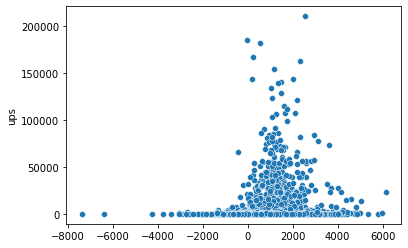

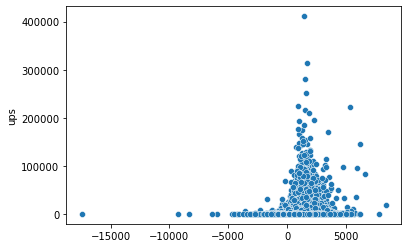

In [ ]:
def run_experiment(model, df):
    X = df.drop(columns = ['ups'])
    y = df.ups

    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)

    print("working on", model)

    pipe = make_pipeline( model)
    pipe.fit(X_train, y_train)


    sns.scatterplot(x = pipe.predict(X_test), y = y_test)
    plt.show()
    sns.scatterplot(x = pipe.predict(X_train), y = y_train)
    plt.show()
    
    scores = cross_val_score(pipe,X,y)
    print(scores)

    
for model in [LinearRegression(), xgb.XGBRegressor(random_state=2)]:
    run_experiment(model, merged)
